In [607]:

import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
import sklearn as skl
import sklearn.multioutput
import scipy.stats as stats
import re
from statsmodels.stats.power import TTestIndPower
import math

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [608]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

raw_df = pd.read_csv("main_db/main_db.csv", decimal=',')
tmp_df = raw_df[(~raw_df.subscription_time.isna())]
no_sub = raw_df[(raw_df.subscription_time.isna())]
df = tmp_df[(tmp_df.reject_flg == 0) | ((tmp_df.reject_flg == 1) & (tmp_df.account_flg + tmp_df.utilization_flg >= 1))].copy()
df = df.drop([34833])
df = df.drop([60954])
df = df.drop([16874])
df = df.drop([54989])
df = df.drop([18014])
df = df.drop([66257])
df = df.drop([31612])

In [609]:
df.shape


(41264, 66)

In [610]:
df.dtypes

Unnamed: 0                     int64
application_id                object
primary_income_dt             object
party_rk                     float64
product_code                  object
account_own_flg                int64
sch_flg                        int64
success_flg                    int64
validation_flg                 int64
reject_flg                     int64
account_flg                    int64
utilization_flg                int64
ccr_account_first_open_dt     object
dep_account_first_open_dt     object
cur_account_first_open_dt     object
sav_account_first_open_dt     object
cln_account_first_open_dt     object
pos_account_first_open_dt     object
subscription_time            float64
channel_desc                  object
region_size                   object
trial_type                    object
metall_flg                     int64
age_segment                   object
res_segment                   object
open_cc_flg                    int64
util_cc_flg                    int64
o

In [611]:
df.describe()

,Unnamed: 0,party_rk,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,account_flg,utilization_flg,subscription_time,metall_flg,open_cc_flg,util_cc_flg,open_cn_flg,util_cn_flg,open_sav_flg,util_sav_flg,open_dep_flg,util_dep_flg,open_mb_flg,util_mb_flg,open_inv_flg,util_inv_flg,in_5ms_cnt,in_3ms_cnt,in_1ms_cnt,out_5ms_puc_cnt,out_3ms_puc_cnt,out_1ms_puc_cnt,out_5ms_uch_cnt,out_3ms_uch_cnt,out_1ms_uch_cnt,out_5ms_all_cnt,out_3ms_all_cnt,out_1ms_all_cnt,in_total_5ms_amt,in_total_3ms_amt,in_total_1ms_amt,out_total_5ms_amt,out_total_3ms_amt,out_total_1ms_amt,lk_flg,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg
count,41264.000000,4.126400e+04,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,4.126400e+04,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41236.000000,41235.000000,41264.00000,41236.000000,41235.000000,41264.000000,41236.000000,41235.000000,41264.000000,41236.000000,41235.000000,4.126400e+04,4.126400e+04,4.126400e+04,4.126400e+04,4.126400e+04,4.126400e+04,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.0,41264.000000,41264.000000,41264.000000
mean,37070.785406,7.031039e+08,0.889250,0.508191,0.363731,0.007900,0.430690,0.975281,0.350330,4.519143e+06,0.896714,0.057605,0.043937,0.027797,0.022829,0.130695,0.089109,0.003417,0.003344,0.098706,0.067032,0.129508,0.053218,229.026076,180.931346,122.780914,202.98403,156.645261,104.273142,11.349554,8.713939,5.651873,98.738295,77.991124,52.717352,4.788660e+05,3.857065e+05,2.721947e+05,4.769511e+05,3.837745e+05,2.707709e+05,0.014565,0.000024,0.008118,0.007561,0.002496,0.007052,0.122940,0.0,0.033080,0.004726,0.008555
std,21284.188536,2.496279e+08,0.313826,0.499939,0.481078,0.088533,0.495179,0.155269,0.477079,2.769162e+06,0.304336,0.232997,0.204957,0.164392,0.149359,0.337071,0.284905,0.058356,0.057734,0.298270,0.250080,0.335765,0.224471,311.032369,245.438797,172.358347,261.56277,196.393219,126.992639,21.069069,16.287071,11.177793,138.568835,108.075731,72.959425,1.358049e+06,1.202799e+06,1.053730e+06,1.355112e+06,1.200179e+06,1.050387e+06,0.119804,0.004923,0.089737,0.086626,0.049899,0.083681,0.328372,0.0,0.178847,0.068582,0.092096
min,1.000000,2.310600e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.461511e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,18735.500000,5.494499e+08,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.678398e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,22.000000,16.000000,9.00000,7.000000,4.000000,0.000000,0.000000,0.000000,8.000000,7.000000,5.000000,1.957143e+04,1.568326e+04,1.031926e+04,1.914806e+04,1.527730e+04,1.022352e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,37137.000000,7.636338e+08,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.387907e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,103.000000,73.000000,97.00000,81.000000,58.000000,4.000000,3.000000,2.000000,50.000000,41.000000,28.000000,1.420391e+05,1.158805e+05,8.015004e+04,1.402999e+05,1.149429e+05,7.961631e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,55501.750000,9.066849e+08,1.000000,1.000000,1.000000,0.000000,1.000000,1.0

In [612]:
df["primary_income_dt"] = pd.to_datetime(df["primary_income_dt"])

df["ccr_account_first_open_dt"] = pd.to_datetime(df["ccr_account_first_open_dt"])
df["dep_account_first_open_dt"] = pd.to_datetime(df["dep_account_first_open_dt"])
df["cur_account_first_open_dt"] = pd.to_datetime(df["cur_account_first_open_dt"])
df["sav_account_first_open_dt"] = pd.to_datetime(df["sav_account_first_open_dt"])
df["cln_account_first_open_dt"] = pd.to_datetime(df["cln_account_first_open_dt"])
df["pos_account_first_open_dt"] = pd.to_datetime(df["pos_account_first_open_dt"])
df['any_feature'] = df.iloc[:, -11:-1].sum(axis=1)
df["money_out"] = df["out_total_5ms_amt"]
df["money_in"] = df["in_total_5ms_amt"]
df["inout"] = df["money_out"] / df["money_in"]

df["trial_months"] = df.trial_type.str.extract('(\d+)')
df["trial_months"] = pd.to_numeric(df["trial_months"])
df["trial_months"] = df["trial_months"].fillna(0)

# df[-6:-1]
df['cc_flg'] = df['open_cc_flg'] * df['util_cc_flg']
df['cn_flg'] = df['open_cn_flg'] * df['util_cn_flg']
df['sav_flg'] = df['open_sav_flg'] * df['util_sav_flg']
df['dep_flg'] = df['open_dep_flg'] * df['util_dep_flg']
df['inv_flg'] = df['open_inv_flg'] * df['util_inv_flg']
df['mb_flg'] = df['open_mb_flg'] * df['util_mb_flg']
df["pos_flg"] = np.where(df["pos_account_first_open_dt"].isna(), 0, 1)

df['any_open'] = df['cc_flg'] + df['cn_flg'] + df['sav_flg'] + df['dep_flg'] + \
                 df['inv_flg'] + df['mb_flg'] + df["pos_flg"]
df['bank_and_feature'] = df['any_open'] + df['any_feature']

df["subscription_days"] = df["subscription_time"] // (3600 * 24)
df["true_subscription_days"] = np.where(df["subscription_days"] > 30 * df["trial_months"], 
                                        df["subscription_days"] - 30 * df["trial_months"], 0)
df["true_subscription_months"] = round(df["true_subscription_days"]/30)
df["age_rank"] = df["age_segment"].rank(method="dense")

df['feat_set'] = df['cc_flg'] * 2 ** 6 + df['cn_flg'] * 2 ** 5 + df['sav_flg'] * 2 ** 4 + df['dep_flg'] * 2 ** 3 + \
                 df['inv_flg'] * 2 ** 2 + df['mb_flg'] * 2 + df['pos_flg']
df['feat_set'].value_counts()

feat_set
0      28878
1       2758
16      2456
2       1838
4       1238
64      1043
33       424
20       277
17       259
18       231
32       221
6        177
65       161
66       146
5        128
3        128
80       105
68       101
49        60
8         58
22        48
97        41
70        31
37        29
21        29
48        28
84        27
24        25
96        24
34        23
35        21
19        20
82        20
67        18
69        18
7         16
81        14
9         11
53        10
36        10
99         8
52         7
86         7
85         7
25         6
12         5
113        5
101        5
28         5
83         5
73         4
51         4
23         3
112        3
39         3
72         3
10         3
117        2
11         2
26         2
88         2
40         2
50         2
76         2
100        1
87         1
116        1
105        1
57         1
29         1
55         1
46         1
102        1
119        1
98         1
115        1
75 

In [613]:
df["bank_and_feature"].value_counts()

bank_and_feature
0     25054
1     10648
2      3875
3      1246
4       348
5        77
6        11
7         3
8         1
10        1
Name: count, dtype: int64

In [614]:
main_data = df[[#'Unnamed: 0', 'application_id', 'primary_income_dt', 'party_rk',
       'product_code', 'account_own_flg', 'sch_flg', 'success_flg',
       'validation_flg', 'reject_flg', 'account_flg', 'utilization_flg',
       'ccr_account_first_open_dt', 'dep_account_first_open_dt',
       'cur_account_first_open_dt', 'sav_account_first_open_dt',
       'cln_account_first_open_dt', 'pos_account_first_open_dt',
       'subscription_time', 'channel_desc', 'region_size', 'trial_type',
       'metall_flg', 'age_segment', 'res_segment', 'open_cc_flg',
       'util_cc_flg', 'open_cn_flg', 'util_cn_flg', 'open_sav_flg',
       'util_sav_flg', 'open_dep_flg', 'util_dep_flg', 'open_mb_flg',
       'util_mb_flg', 'open_inv_flg', 'util_inv_flg', 'in_5ms_cnt',
       #'in_3ms_cnt', 'in_1ms_cnt', 'out_5ms_puc_cnt', 'out_3ms_puc_cnt',
       #'out_1ms_puc_cnt', 'out_5ms_uch_cnt', 'out_3ms_uch_cnt',
       #'out_1ms_uch_cnt', 'out_5ms_all_cnt', 'out_3ms_all_cnt',
       #'out_1ms_all_cnt', 'in_total_5ms_amt', 'in_total_3ms_amt',
       #'in_total_1ms_amt', 'out_total_5ms_amt', 'out_total_3ms_amt',
       #'out_total_1ms_amt', 
        'lk_flg', 'inkas_flg', 'cash_out_flg', 'vzr_flg',
       'concierge_flg', 'cb_flg', 'invest_flg', 'mobile_flg', 'out_c2c_flg',
       'car_ins_flg', 'percent_flg', 'subscription_days', 'age_rank']].copy()

main_data = main_data[main_data.age_segment != "Пусто"]

In [615]:
numeric_data = main_data.select_dtypes(numerics)
numeric_data = numeric_data.fillna(0)

In [616]:
corr_main = numeric_data.corr()
age_corr = corr_main[["age_rank"]]

In [617]:
df.columns

Index(['Unnamed: 0', 'application_id', 'primary_income_dt', 'party_rk',
       'product_code', 'account_own_flg', 'sch_flg', 'success_flg',
       'validation_flg', 'reject_flg', 'account_flg', 'utilization_flg',
       'ccr_account_first_open_dt', 'dep_account_first_open_dt',
       'cur_account_first_open_dt', 'sav_account_first_open_dt',
       'cln_account_first_open_dt', 'pos_account_first_open_dt',
       'subscription_time', 'channel_desc', 'region_size', 'trial_type',
       'metall_flg', 'age_segment', 'res_segment', 'open_cc_flg',
       'util_cc_flg', 'open_cn_flg', 'util_cn_flg', 'open_sav_flg',
       'util_sav_flg', 'open_dep_flg', 'util_dep_flg', 'open_mb_flg',
       'util_mb_flg', 'open_inv_flg', 'util_inv_flg', 'in_5ms_cnt',
       'in_3ms_cnt', 'in_1ms_cnt', 'out_5ms_puc_cnt', 'out_3ms_puc_cnt',
       'out_1ms_puc_cnt', 'out_5ms_uch_cnt', 'out_3ms_uch_cnt',
       'out_1ms_uch_cnt', 'out_5ms_all_cnt', 'out_3ms_all_cnt',
       'out_1ms_all_cnt', 'in_total_5ms_amt', 

In [618]:
age_corr

,age_rank
account_own_flg,-0.136603
sch_flg,0.057569
success_flg,0.063702
validation_flg,0.012084
reject_flg,-0.130482
account_flg,0.001048
utilization_flg,0.039112
subscription_time,0.132300
metall_flg,-0.137516
open_cc_flg,-0.003471


<Axes: >

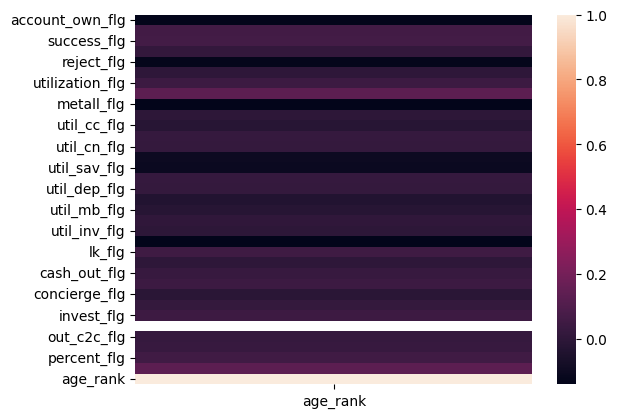

In [619]:
age_corr.fillna(0)
age_corr_arr = np.asarray(age_corr).reshape(age_corr.shape[0], 1)
#age_corr_arr.shape
sns.heatmap(age_corr)

In [620]:
transaction_data = df[[#'Unnamed: 0', 'application_id', 'primary_income_dt', 'party_rk',
       #'product_code', 'account_own_flg', 
       'sch_flg', 'success_flg',
       'validation_flg', 'reject_flg', 'account_flg', 'utilization_flg',
       #'ccr_account_first_open_dt', 'dep_account_first_open_dt',
       #'cur_account_first_open_dt', 'sav_account_first_open_dt',
       #'cln_account_first_open_dt', 'pos_account_first_open_dt',
       'subscription_time', #'channel_desc', 'region_size', 'trial_type',
       'metall_flg', #'age_segment', 'res_segment', 'open_cc_flg',
       #'util_cc_flg', 'open_cn_flg', 'util_cn_flg', 'open_sav_flg',
       #'util_sav_flg', 'open_dep_flg', 'util_dep_flg', 'open_mb_flg',
       #'util_mb_flg', 'open_inv_flg', 'util_inv_flg', 'in_5ms_cnt',
       #'in_3ms_cnt', 'in_1ms_cnt', 'out_5ms_puc_cnt', 'out_3ms_puc_cnt',
       #'out_1ms_puc_cnt', 'out_5ms_uch_cnt', 'out_3ms_uch_cnt',
       #'out_1ms_uch_cnt', 'out_5ms_all_cnt', 'out_3ms_all_cnt',
       #'out_1ms_all_cnt', 'in_total_5ms_amt', 'in_total_3ms_amt',
       #'in_total_1ms_amt', 'out_total_5ms_amt', 'out_total_3ms_amt',
       #'out_total_1ms_amt', 'lk_flg', 'inkas_flg', 'cash_out_flg', 'vzr_flg',
       #'concierge_flg', 'cb_flg', 'invest_flg', 'mobile_flg', 'out_c2c_flg',
       'car_ins_flg', 'percent_flg', 'trial_months', 'any_feature',
       'money_out', 'money_in', 'inout', 'cc_flg', 'cn_flg', 'sav_flg',
       'dep_flg', 'inv_flg', 'mb_flg', 'any_open', 'subscription_days',
       'true_subscription_days', 'true_subscription_months', 'age_rank']]

#transaction_data = transaction_data[transaction_data.age_segment != "Пусто"]

<Axes: >

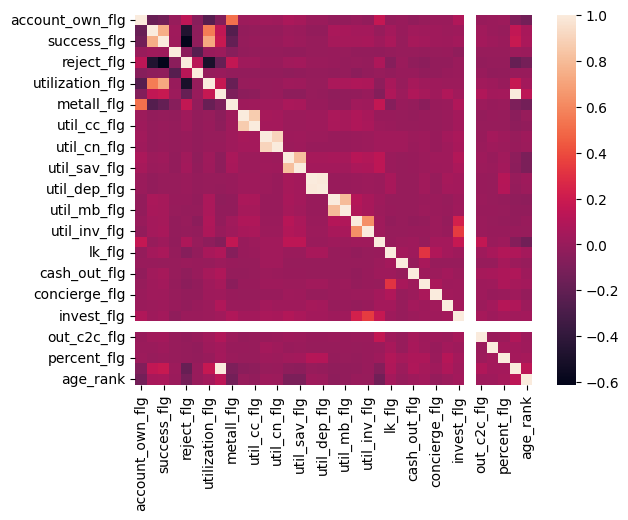

In [621]:
numeric_trans = transaction_data.select_dtypes(numerics)
numeric_trans = numeric_trans.fillna(0)
corr_trans = numeric_data.corr()
sns.heatmap(corr_trans)
#age_corr = corr_main[["age_rank"]]

In [622]:
corr_trans

,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,account_flg,utilization_flg,subscription_time,metall_flg,open_cc_flg,util_cc_flg,open_cn_flg,util_cn_flg,open_sav_flg,util_sav_flg,open_dep_flg,util_dep_flg,open_mb_flg,util_mb_flg,open_inv_flg,util_inv_flg,in_5ms_cnt,lk_flg,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg,subscription_days,age_rank
account_own_flg,1.000000,-0.181736,-0.143795,-0.000893,0.133770,-0.057058,-0.246593,-0.080754,0.520802,0.018611,0.019961,0.032141,0.028818,0.070552,0.052586,0.011243,0.010816,-0.017360,-0.015228,0.005688,-0.012788,0.165336,-0.010196,0.002058,-0.019663,-0.000662,0.008029,0.007701,0.089319,NaN,0.005502,0.006323,0.016120,-0.082384,-0.136603
sch_flg,-0.181736,1.000000,0.748379,0.027708,-0.469218,-0.034457,0.559212,0.151581,-0.256440,-0.017548,-0.012016,-0.010376,-0.007477,0.017833,0.007079,-0.015685,-0.015341,0.063120,0.056831,0.048033,0.044160,-0.001644,0.044469,0.005664,0.031611,0.027701,0.029343,0.016180,0.020472,NaN,0.031663,0.011432,-0.000291,0.152202,0.057569
success_flg,-0.143795,0.748379,1.000000,0.022545,-0.610245,-0.025721,0.719157,0.178329,-0.191661,-0.009337,0.000066,-0.001017,0.001091,0.029124,0.018358,-0.002119,-0.002048,0.050318,0.052812,0.055481,0.058015,0.019428,0.063083,-0.004318,0.051077,0.038666,0.030539,0.021258,0.038109,NaN,0.038750,0.019841,0.008559,0.178417,0.063702
validation_flg,-0.000893,0.027708,0.022545,1.000000,-0.047121,-0.246068,0.003125,0.014881,-0.057684,-0.012925,-0.008657,-0.008983,-0.006730,-0.016915,-0.018622,-0.005671,-0.005600,0.000719,-0.000916,-0.015141,-0.014325,-0.021045,-0.008946,-0.000515,-0.003778,-0.008413,-0.004550,0.000605,-0.030587,NaN,-0.001537,-0.006124,-0.001850,0.015249,0.012084
reject_flg,0.133770,-0.469218,-0.610245,-0.047121,1.000000,0.123089,-0.501143,-0.185471,0.159077,0.025696,0.026097,0.001055,0.001016,0.036875,0.038348,0.007831,0.009316,-0.000095,-0.009824,-0.002197,-0.008684,0.077511,-0.064043,0.006525,-0.026260,-0.041324,-0.016830,-0.014710,0.009009,NaN,-0.014264,-0.011906,-0.010821,-0.186783,-0.130482
account_flg,-0.057058,-0.034457,-0.025721,-0.246068,0.123089,1.000000,-0.010206,0.005391,-0.015488,-0.017685,-0.013263,-0.015527,-0.014438,-0.025732,-0.023108,-0.010220,-0.010599,-0.014823,-0.012490,-0.040558,-0.015745,-0.003980,-0.015355,0.000906,0.004359,-0.021682,-0.012945,0.001614,0.008470,NaN,0.004330,-0.023544,-0.015471,0.005495,0.001048
utilization_flg,-0.246593,0.559212,0.719157,0.003125,-0.501143,-0.010206,1.000000,0.173722,-0.179656,-0.003318,0.002701,-0.004553,0.001132,0.026933,0.019363,-0.005751,-0.005770,0.069851,0.073845,0.085579,0.079011,-0.032508,0.058430,-0.004188,0.052554,0.029172,0.022775,0.018460,0.016673,NaN,0.032199,0.018975,0.000695,0.173892,0.039112
subscription_time,-0.080754,0.151581,0.178329,0.014881,-0.185471,0.005391,0.173722,1.000000,-0.095006,-0.043594,-0.033844,-0.003155,0.001681,-0.036636,-0.036694,-0.005582,-0.006612,-0.027354,-0.023054,-0.015291,0.003404,-0.071104,0.084832,0.018224,0.086595,0.054115,0.028443,0.088267,0.034221,NaN,0.091781,0.039456,0.048275,0.999925,0.132300
metall_flg,0.520802,-0.256440,-0.191661,-0.057684,0.159077,-0.015488,-0.179656,-0.095006,1.000000,0.020858,0.025733,0.029132,0.025290,0.067871,0.057072,0.003683,0.003176,-0.023199,-0.024957,0.036989,0.028319,0.160880,-0.064045,0.002001,-0.012116,-0.045332,0.003144,0.009941,0.088350,NaN,0.015008,0.002148,0.006312,-0.096611,-0.137516
open_cc_flg,0.018611,-0.017548,-0.009337,-0.012925,0.025696,-0.017685,-0.003318,-0.043594,0.020858,1.000000,0.866599,0.054861,0.050097,0.015815,0.014538,0.022266,0.022938,0.069183,0.054215,0.081848,0.062628,0.000196,0.002288,-0.001418,-0.007548,0.000978,-0.001439,0.007462,0.039690,NaN,-0.012611,0.001717,-0.004282,-0.044153,-0.003471


In [623]:
corr_trans["age_rank"]

account_own_flg     -0.136603
sch_flg              0.057569
success_flg          0.063702
validation_flg       0.012084
reject_flg          -0.130482
account_flg          0.001048
utilization_flg      0.039112
subscription_time    0.132300
metall_flg          -0.137516
open_cc_flg         -0.003471
util_cc_flg         -0.023462
open_cn_flg          0.023756
util_cn_flg          0.018739
open_sav_flg        -0.104905
util_sav_flg        -0.105909
open_dep_flg         0.021283
util_dep_flg         0.017439
open_mb_flg         -0.033907
util_mb_flg         -0.020617
open_inv_flg         0.005195
util_inv_flg        -0.005235
in_5ms_cnt          -0.140818
lk_flg               0.047846
inkas_flg           -0.001046
cash_out_flg         0.024591
vzr_flg              0.039415
concierge_flg       -0.011955
cb_flg               0.017915
invest_flg           0.043769
mobile_flg                NaN
out_c2c_flg          0.020410
car_ins_flg          0.025205
percent_flg          0.054733
subscripti

In [624]:
df.fillna(0)
sub_ppl = df[(~df.trial_type.isna()) & (df.age_segment != "14-17") & (df.age_segment != "0-13") & (df.reject_flg != 1)]
non_sub_ppl = df[(df.trial_type.isna()) & (df.age_segment != "14-17") & (df.age_segment != "0-13") & (df.reject_flg != 1)] 

Text(0.5, 0, 'Subscription days')

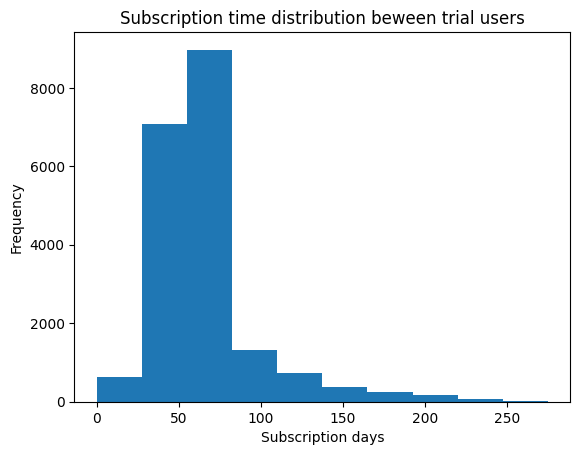

In [625]:
sd_sub = sub_ppl["subscription_days"].plot(kind="hist", title="Subscription time distribution beween trial users")
sd_sub.set_xlabel("Subscription days")

In [626]:
sub_ppl["age_segment"].value_counts()

age_segment
Пусто    6094
18-22    4067
26-30    2131
31-35    1954
23-25    1439
36-40    1424
41-45     986
46-50     644
51-55     358
56-60     233
61-65     139
65+       123
Name: count, dtype: int64

<Axes: title={'center': 'Usability of features among trial users'}, ylabel='Frequency'>

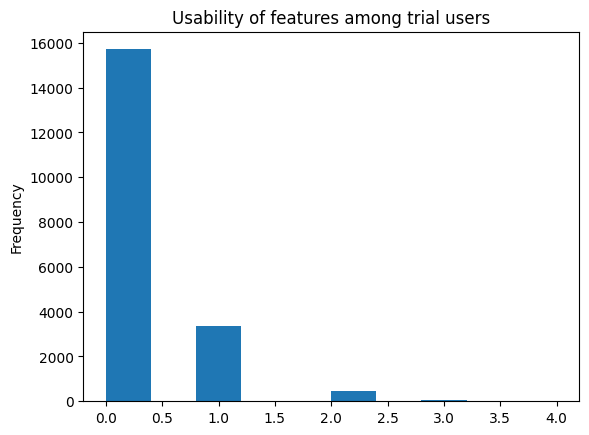

In [627]:
sub_ppl["any_feature"].plot(kind="hist", title="Usability of features among trial users")

In [628]:
urban = df[(df.region_size == "ГОРОД-МИЛЛИОННИК") | (df.region_size == "МОСКВА") | (df.region_size == "САНКТ-ПЕТЕРБУРГ") | (df.region_size == "ГОРОД")]
suburb = df[(df.region_size != "ГОРОД-МИЛЛИОННИК") & (df.region_size != "МОСКВА") & (df.region_size != "САНКТ-ПЕТЕРБУРГ") | (df.region_size != "ГОРОД")]

In [629]:
df['channel_desc'].value_counts()

channel_desc
МБ     35852
Web     5412
Name: count, dtype: int64

In [630]:
df['res_segment'].value_counts()

res_segment
РФ            30395
Пусто          9338
Восток СНГ      933
Запад СНГ       326
Остальное       261
Name: count, dtype: int64

In [631]:
sng = df[(df.res_segment != "Пусто") & (df.res_segment != "РФ")]
rf = df[(df.res_segment == "РФ")]
sng["subscription_days"].describe()

count    1531.000000
mean       60.099935
std        34.593491
min         0.000000
25%        30.000000
50%        61.000000
75%        61.000000
max       244.000000
Name: subscription_days, dtype: float64

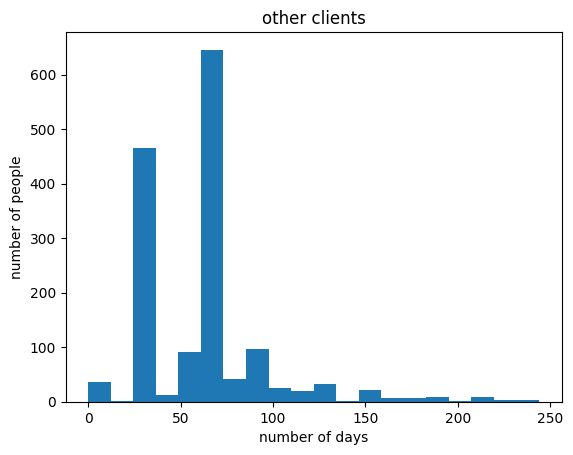

In [632]:
sng_sub = sng["subscription_days"].plot(kind="hist",bins=20, title="other clients", ylabel="number of people", xlabel="number of days")

In [633]:
rf["age_segment"].value_counts() / rf.shape[0]

age_segment
18-22    0.245962
14-17    0.230795
26-30    0.114032
31-35    0.099753
23-25    0.081954
36-40    0.069650
41-45    0.044613
Пусто    0.043297
46-50    0.028228
51-55    0.016187
56-60    0.010067
61-65    0.006350
65+      0.006087
0-13     0.003027
Name: count, dtype: float64

In [634]:
sng["age_segment"].value_counts() / sng.shape[0]

age_segment
18-22    0.308948
26-30    0.197910
23-25    0.137818
31-35    0.121489
36-40    0.075114
41-45    0.062704
46-50    0.033965
14-17    0.026780
51-55    0.013717
61-65    0.004572
Пусто    0.003919
56-60    0.003919
65+      0.001306
0-13     0.000653
Name: count, dtype: float64

In [635]:
df["any_open"].value_counts()

any_open
0    28878
1     9612
2     2271
3      431
4       66
5        5
6        1
Name: count, dtype: int64

In [636]:
res_df = df
no_acc = res_df[(res_df.any_open == 0)]
acc = res_df[res_df.any_open > 0]
acc["any_open"].corr(acc["true_subscription_months"])

-0.011570753077715778

In [637]:
no_acc_age = no_acc[no_acc.age_segment != "Пусто"]["age_segment"]
acc_age = acc[acc.age_segment != "Пусто"]["age_segment"]
no_acc_age.value_counts() / no_acc_age.shape[0]

age_segment
18-22    0.247578
14-17    0.234463
26-30    0.121657
31-35    0.106595
23-25    0.084998
36-40    0.075590
41-45    0.049868
46-50    0.031561
51-55    0.018909
56-60    0.011818
61-65    0.007276
65+      0.006813
0-13     0.002410
Name: count, dtype: float64

In [638]:
acc_age.value_counts() / acc_age.shape[0]

age_segment
18-22    0.288800
14-17    0.221225
26-30    0.126731
31-35    0.101695
23-25    0.096156
36-40    0.066578
41-45    0.041653
46-50    0.025368
51-55    0.011632
56-60    0.006314
61-65    0.004763
0-13     0.004542
65+      0.004431
Name: count, dtype: float64

<Axes: title={'center': 'People with no accounts open'}, xlabel='number of days', ylabel='number of people'>

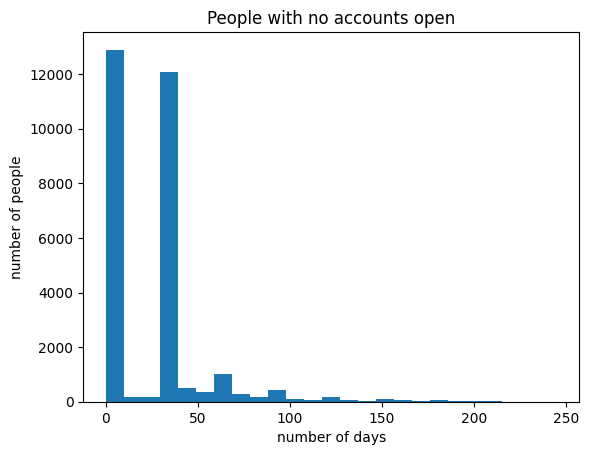

In [639]:
no_acc["true_subscription_days"].plot(kind="hist", bins=25,title="People with no accounts open", ylabel="number of people", xlabel="number of days")

<Axes: title={'center': 'People with accounts open'}, xlabel='number of days', ylabel='number of people'>

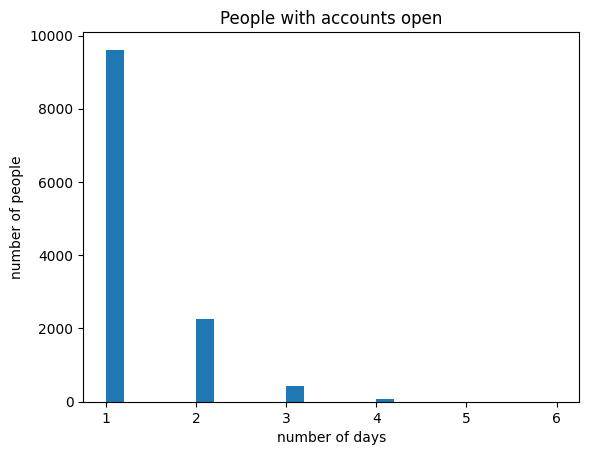

In [640]:
acc["any_open"].plot(kind="hist", bins=25,title="People with accounts open", ylabel="number of people", xlabel="number of days")

In [641]:
no_acc_old = res_df[(res_df.any_open == 0) & (res_df.age_segment != "14-17") & (res_df.age_segment != "Пусто")]
acc_old = res_df[(res_df.any_open != 0) & (res_df.age_segment != "14-17") & (res_df.age_segment != "Пусто")]

<Axes: title={'center': 'People with no accounts open'}, xlabel='number of months', ylabel='number of people'>

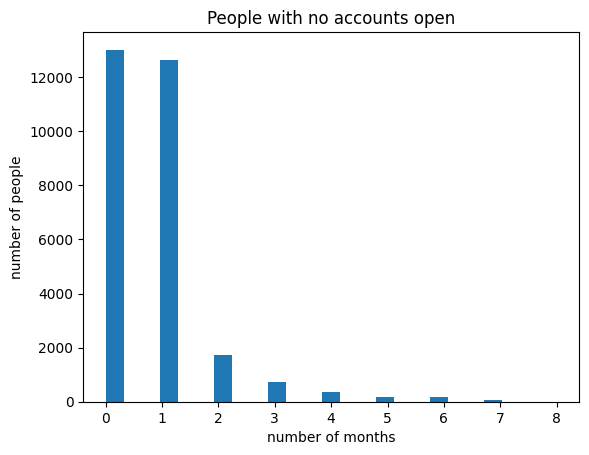

In [642]:
no_acc["true_subscription_months"].plot(kind="hist", bins=25,title="People with no accounts open", ylabel="number of people", xlabel="number of months")

<Axes: title={'center': 'People with accounts open'}, xlabel='number of months', ylabel='number of people'>

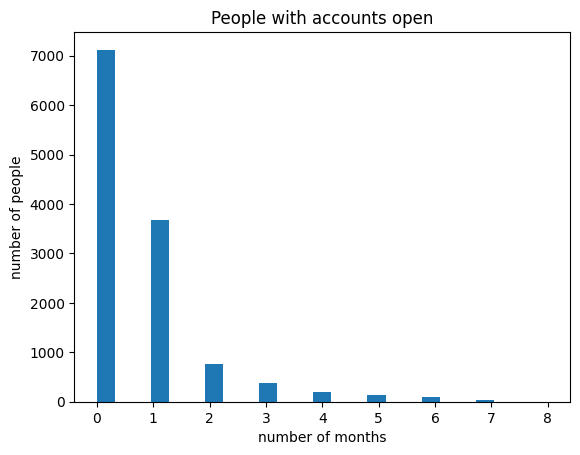

In [643]:
acc["true_subscription_months"].plot(kind="hist", bins=25,title="People with accounts open", ylabel="number of people", xlabel="number of months")

<Axes: xlabel='true_subscription_days', ylabel='any_open'>

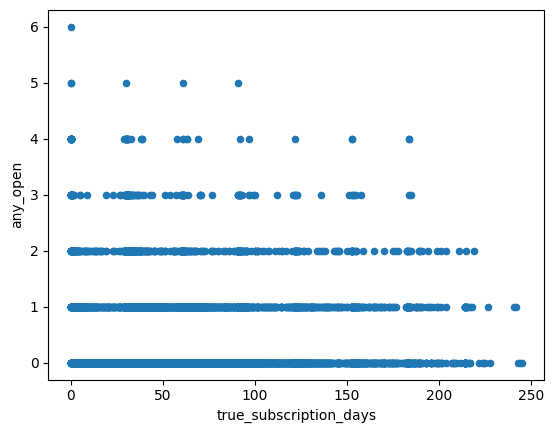

In [644]:
res_df.plot(kind="scatter", x="true_subscription_days", y="any_open")

<Axes: >

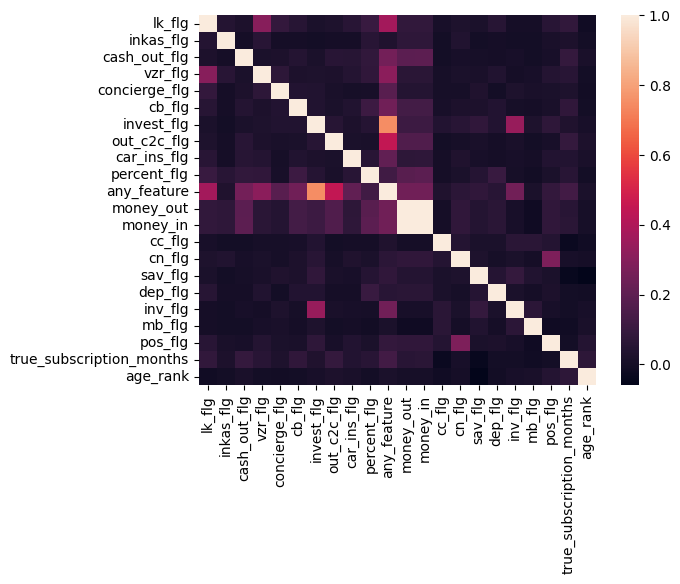

In [645]:
_data = df[[#'Unnamed: 0', 'application_id', 'primary_income_dt', 'party_rk',
       #'product_code', 'account_own_flg', 
       #'sch_flg', 'success_flg',
       #'validation_flg', 'reject_flg', 'account_flg', 'utilization_flg',
       #'ccr_account_first_open_dt', 'dep_account_first_open_dt',
       #'cur_account_first_open_dt', 'sav_account_first_open_dt',
       #'cln_account_first_open_dt', 'pos_account_first_open_dt',
       #'subscription_time', 'channel_desc', 'region_size', 'trial_type',
       #'metall_flg', #'age_segment', 'res_segment', 'open_cc_flg',
       #'util_cc_flg', 'open_cn_flg', 'util_cn_flg', 'open_sav_flg',
       #'util_sav_flg', 'open_dep_flg', 'util_dep_flg', 'open_mb_flg',
       #'util_mb_flg', 'open_inv_flg', 'util_inv_flg', 'in_5ms_cnt',
       #'in_3ms_cnt', 'in_1ms_cnt', 'out_5ms_puc_cnt', 'out_3ms_puc_cnt',
       #'out_1ms_puc_cnt', 'out_5ms_uch_cnt', 'out_3ms_uch_cnt',
       #'out_1ms_uch_cnt', 'out_5ms_all_cnt', 'out_3ms_all_cnt',
       #'out_1ms_all_cnt', 'in_total_5ms_amt', 'in_total_3ms_amt',
       #'in_total_1ms_amt', 'out_total_5ms_amt', 'out_total_3ms_amt',
       #'out_total_1ms_amt', 
       'lk_flg', 'inkas_flg', 'cash_out_flg', 'vzr_flg',
       'concierge_flg', 'cb_flg', 'invest_flg', #'mobile_flg',
       'out_c2c_flg',
       'car_ins_flg', 'percent_flg', 
       #'trial_months', 
       'any_feature',
       'money_out', 'money_in', #'inout', 
       'cc_flg', 'cn_flg', 'sav_flg',
       'dep_flg', 'inv_flg', 'mb_flg', 'pos_flg', #'any_open', #'subscription_days', 'true_subscription_days', 
        'true_subscription_months', 'age_rank']]
numeric_trans = _data.select_dtypes(numerics)
numeric_trans = _data.fillna(0)
corr_trans = _data.corr()
sns.heatmap(corr_trans)

In [646]:
df["any_feature"].corr(df["any_open"])

0.19302905923460814

<Axes: xlabel='true_subscription_days', ylabel='bank_and_feature'>

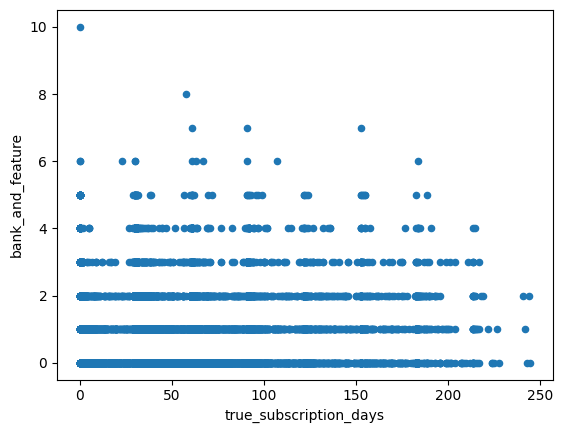

In [647]:
res_df.plot(kind="scatter", x="true_subscription_days", y="bank_and_feature")

In [648]:
res_df["reject_flg"].value_counts()

reject_flg
0    23492
1    17772
Name: count, dtype: int64

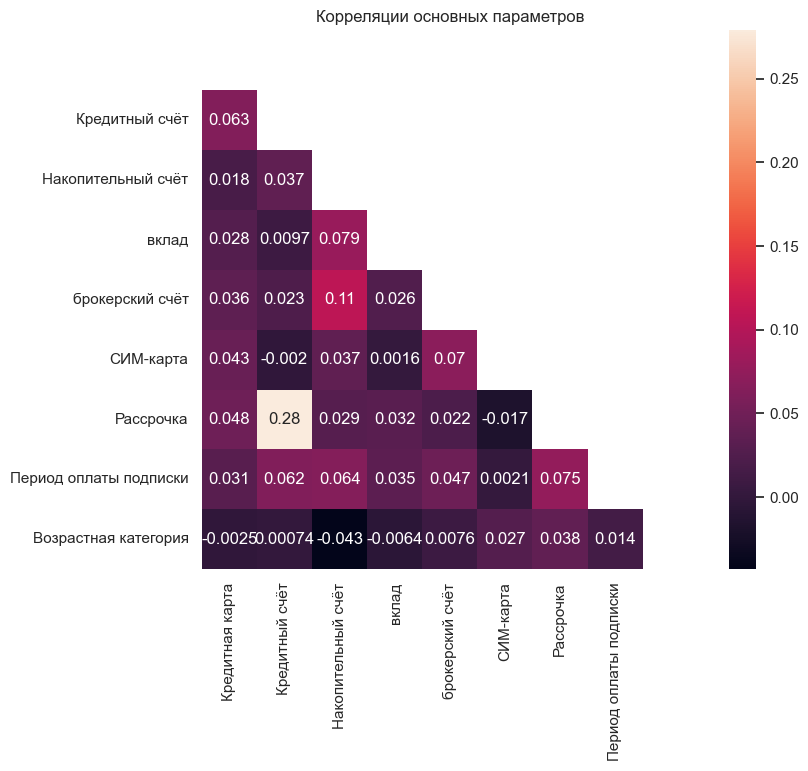

In [695]:
using_data = df[[#'Unnamed: 0', 'application_id', 'primary_income_dt', 'party_rk',
       #'product_code', 'account_own_flg', 
       #'sch_flg', 'success_flg',
       #'validation_flg', 'reject_flg', 'account_flg', 'utilization_flg',
       #'ccr_account_first_open_dt', 'dep_account_first_open_dt',
       #'cur_account_first_open_dt', 'sav_account_first_open_dt',
       #'cln_account_first_open_dt', 'pos_account_first_open_dt',
       #'subscription_time', 'channel_desc', 'region_size', 'trial_type',
       #'metall_flg', #'age_segment', 'res_segment', 'open_cc_flg',
       #'util_cc_flg', 'open_cn_flg', 'util_cn_flg', 'open_sav_flg',
       #'util_sav_flg', 'open_dep_flg', 'util_dep_flg', 'open_mb_flg',
       #'util_mb_flg', 'open_inv_flg', 'util_inv_flg', 'in_5ms_cnt',
       #'in_3ms_cnt', 'in_1ms_cnt', 'out_5ms_puc_cnt', 'out_3ms_puc_cnt',
       #'out_1ms_puc_cnt', 'out_5ms_uch_cnt', 'out_3ms_uch_cnt',
       #'out_1ms_uch_cnt', 'out_5ms_all_cnt', 'out_3ms_all_cnt',
       #'out_1ms_all_cnt', 'in_total_5ms_amt', 'in_total_3ms_amt',
       #'in_total_1ms_amt', 'out_total_5ms_amt', 'out_total_3ms_amt',
       #'out_total_1ms_amt', 
       #'lk_flg', 'inkas_flg', 'cash_out_flg', 'vzr_flg',
       #'concierge_flg', 'cb_flg', 'invest_flg', 
       #'mobile_flg', 'out_c2c_flg',
       #'car_ins_flg', 'percent_flg', 
       #'trial_months', 
       #'any_feature',
       #'money_out', 'money_in', #'inout', 
       'cc_flg', 'cn_flg', 'sav_flg',
       'dep_flg', 'inv_flg', 'mb_flg', 'pos_flg', #'any_open', #'subscription_days', 'true_subscription_days', 
        'true_subscription_months', 'age_rank']].copy()
using_data = using_data[using_data.true_subscription_months > 0]
using_data = using_data.rename(columns={"cc_flg": "Кредитная карта", "cn_flg": "Кредитный счёт", 'sav_flg': "Накопительный счёт", 'dep_flg': "вклад", 
                          "inv_flg": "брокерский счёт", "mb_flg": "СИМ-карта", "pos_flg": "Рассрочка", 
                           "true_subscription_months": "Период оплаты подписки", "age_rank": "Возрастная категория"})
#sns.set(style="white")
t_numeric_trans = using_data.select_dtypes(numerics)
t_numeric_trans = using_data.fillna(0)
t_corr_trans = t_numeric_trans.corr()
mask = np.zeros_like(t_corr_trans, dtype='bool')
mask[np.triu_indices_from(mask)] = True
plt.pyplot.figure(figsize = (8, 7))
plt.pyplot.title('Корреляции основных параметров')

sns.heatmap(t_corr_trans, mask=mask, annot=True, xticklabels=["Кредитная карта", "Кредитный счёт", "Накопительный счёт", "вклад", 
                          "брокерский счёт", "СИМ-карта", "Рассрочка", 
                           "Период оплаты подписки"],
           yticklabels=["", "Кредитный счёт", "Накопительный счёт", "вклад", 
                          "брокерский счёт", "СИМ-карта", "Рассрочка", 
                           "Период оплаты подписки", "Возрастная категория"])
plt.pyplot.savefig('foo.png', bbox_inches='tight')
plt.pyplot.show()
#print(using_data['pos_flg'].corr(using_data['cn_flg']))

In [650]:
ks = [0.13057355,  0.30916563,  0.22768637,  0.60682218,  0.18242221, -0.01012205,  0.21749814, 1.392231310543616]
res_flags = ['util_cc_flg', 'util_cn_flg', 'util_sav_flg', 'util_dep_flg', 'util_inv_flg', 'util_mb_flg', 'pos_flg']
flags = res_flags + ['pos_flg', 'mean']
bar_colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:red']
#fig, ax = plt.pyplot.subplots()
#ax.bar(flags, ks,color=bar_colors)
#ax.set_title("Coefficients")
df[df["party_rk"] == 1012725953.0]

,Unnamed: 0,application_id,primary_income_dt,party_rk,product_code,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,account_flg,utilization_flg,ccr_account_first_open_dt,dep_account_first_open_dt,cur_account_first_open_dt,sav_account_first_open_dt,cln_account_first_open_dt,pos_account_first_open_dt,subscription_time,channel_desc,region_size,trial_type,metall_flg,age_segment,res_segment,open_cc_flg,util_cc_flg,open_cn_flg,util_cn_flg,open_sav_flg,util_sav_flg,open_dep_flg,util_dep_flg,open_mb_flg,util_mb_flg,open_inv_flg,util_inv_flg,in_5ms_cnt,in_3ms_cnt,in_1ms_cnt,out_5ms_puc_cnt,out_3ms_puc_cnt,out_1ms_puc_cnt,out_5ms_uch_cnt,out_3ms_uch_cnt,out_1ms_uch_cnt,out_5ms_all_cnt,out_3ms_all_cnt,out_1ms_all_cnt,in_total_5ms_amt,in_total_3ms_amt,in_total_1ms_amt,out_total_5ms_amt,out_total_3ms_amt,out_total_1ms_amt,lk_flg,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg,any_feature,money_out,money_in,inout,trial_months,cc_flg,cn_flg,sav_flg,dep_flg,inv_flg,mb_flg,pos_flg,any_open,bank_and_feature,subscription_days,true_subscription_days,true_subscription_months,age_rank,feat_set
56880,56880,7f5c9962050540b081fe8b6a36c0ed2e,2023-03-30,1.012726e+09,DCV,1,0,0,0,0,0,0,2023-03-18,NaT,2019-09-27,2022-11-26,NaT,NaT,420.751936,МБ,ГОРОД,1 mon,1,Пусто,Пусто,0,0,0,0,1,1,0,0,0,0,0,0,913,681.0,369.0,899,693.0,405.0,39,33.0,15.0,362,220.0,113.0,2245829.48,1563384.71,674734.85,2242251.68,1560604.54,672811.65,0,0,0,0,0,0,0,0,0,0,0,0,2242251.68,2245829.48,0.998407,1.0,0,0,1,0,0,0,0,1,1,0.0,0.0,0.0,14.0,16


In [651]:
df['bank_and_feature'].value_counts()

bank_and_feature
0     25054
1     10648
2      3875
3      1246
4       348
5        77
6        11
7         3
8         1
10        1
Name: count, dtype: int64

In [653]:
total_flags = res_flags + feat_flags + ["inkas_flg"]

In [654]:
for i in res_flags:
    print(i, len(df[df[i] == 1]))

util_cc_flg 1813
util_cn_flg 942
util_sav_flg 3677
util_dep_flg 138
util_inv_flg 2196
util_mb_flg 2766
pos_flg 4210


In [655]:
get_p_values(res_flags, 30000, regr_df)

{'util_cc_flg': Ttest_indResult(statistic=4.19386064774879, pvalue=2.9397502480471474e-05),
 'util_cn_flg': Ttest_indResult(statistic=6.715452108018605, pvalue=4.460345124491525e-11),
 'util_sav_flg': Ttest_indResult(statistic=5.677696891255899, pvalue=1.713381399565795e-08),
 'util_dep_flg': Ttest_indResult(statistic=3.078408859459531, pvalue=0.0036432567117292455),
 'util_inv_flg': Ttest_indResult(statistic=5.16253517800171, pvalue=2.835364695191487e-07),
 'util_mb_flg': Ttest_indResult(statistic=1.4798983005260335, pvalue=0.13913895199554535),
 'pos_flg': Ttest_indResult(statistic=6.064426751597428, pvalue=1.8028174584021328e-09)}

In [656]:
X2 = regr_df[['util_cc_flg', 'util_cn_flg', 'util_sav_flg', 'util_inv_flg', 'pos_flg']]
y2 = regr_df['true_subscription_months']

regr2 = linear_model.LinearRegression()
regr2.fit(X2.values, y2)

LinearRegression()

In [657]:
regr2.coef_

array([0.13388932, 0.30853842, 0.23579338, 0.18378119, 0.22049407])

In [658]:
regr2.intercept_

1.3918723585465953

In [659]:
obj = TTestIndPower() 
n = obj.solve_power(effect_size=0.2, alpha=0.05, power=0.8,  alternative='two-sided') 
n

393.4056989990351

In [660]:
regr_df[regr_df['util_cc_flg'] == 1]['true_subscription_months'].var() ** 0.5

1.2190473102934647

In [661]:
regr_df[regr_df['util_cc_flg'] == 0]['true_subscription_months'].var() ** 0.5

1.0141537335023953

In [662]:
regr_df[regr_df['util_cc_flg'] == 1]['true_subscription_months'].mean()

1.617910447761194

In [663]:
regr_df[regr_df['util_cc_flg'] == 0]['true_subscription_months'].mean()

1.4384378513123808

In [664]:
for i in df['bank_and_feature'].unique():
    print(i)

0
1
2
3
4
5
6
8
7
10


In [665]:
u_rank = df['party_rk'].unique()
u_count = df['party_rk'].value_counts().to_dict()
rptg_keys = []
for i in u_count.keys():
    if u_count[i] > 1:
        rptg_keys.append(i)
#print(rptg_keys)
#df[df['party_rk'] == rptg_keys[5]]

In [666]:
df[df['party_rk'] == 589259150.0]

,Unnamed: 0,application_id,primary_income_dt,party_rk,product_code,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,account_flg,utilization_flg,ccr_account_first_open_dt,dep_account_first_open_dt,cur_account_first_open_dt,sav_account_first_open_dt,cln_account_first_open_dt,pos_account_first_open_dt,subscription_time,channel_desc,region_size,trial_type,metall_flg,age_segment,res_segment,open_cc_flg,util_cc_flg,open_cn_flg,util_cn_flg,open_sav_flg,util_sav_flg,open_dep_flg,util_dep_flg,open_mb_flg,util_mb_flg,open_inv_flg,util_inv_flg,in_5ms_cnt,in_3ms_cnt,in_1ms_cnt,out_5ms_puc_cnt,out_3ms_puc_cnt,out_1ms_puc_cnt,out_5ms_uch_cnt,out_3ms_uch_cnt,out_1ms_uch_cnt,out_5ms_all_cnt,out_3ms_all_cnt,out_1ms_all_cnt,in_total_5ms_amt,in_total_3ms_amt,in_total_1ms_amt,out_total_5ms_amt,out_total_3ms_amt,out_total_1ms_amt,lk_flg,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg,any_feature,money_out,money_in,inout,trial_months,cc_flg,cn_flg,sav_flg,dep_flg,inv_flg,mb_flg,pos_flg,any_open,bank_and_feature,subscription_days,true_subscription_days,true_subscription_months,age_rank,feat_set
40383,40383,0fab54d4963541eda570d04f03e79942,2023-03-24,589259150.0,DCV,1,0,0,0,0,0,0,2022-02-19,NaT,2020-12-25,2021-06-22,NaT,NaT,5.270398e+06,МБ,ГОРОД-МИЛЛИОННИК,1 mon,1,14-17,РФ,0,0,0,0,0,0,0,0,0,0,0,0,733,626.0,382.0,1233,976.0,623.0,70,65.0,47.0,391,338.0,233.0,648810.79,575106.59,382398.85,646673.97,572886.86,382661.87,0,0,0,0,0,0,0,0,0,0,0,0,646673.97,648810.79,0.996707,1.0,0,0,0,0,0,0,0,0,0,60.0,30.0,1.0,2.0,0


In [673]:
def get_closest(dic, v, md):
    out = []
    for i in dic.keys():
        if bin(abs(i-v)).count("1") <= md:
            out.append(i)
    return out

def get_counts(df, v, closest):
    c_p, c_n = 0, 0
    for i in closest:
        c_p += len(df[df['feat_set'] == i])
        c_n += len(df[df['feat_set'] == i-v])
    return c_p, c_n

def get_dfs(df, v, closest):
    neg = [i-v for i in closest]
    return df[df['feat_set'].isin(closest)], df[df['feat_set'].isin(neg)]

def get_groups(flags, tgt, df, thresh=390, max_dev=0):
    p = 0
    while flags[p] != tgt:
        p += 1
    p = len(flags) - p - 1
    f_val = 2 ** p
    tmp = df[df['feat_set'] >= f_val]
    cd = tmp['feat_set'].value_counts().to_dict()
    q = []
    for i in cd.keys():
        if i&f_val != f_val:
            q.append(i)
    for i in q:
        cd.pop(i)
    #print(p, f_val, cd)
    v_min, mc = -1, -1
    for i in cd.keys():
        cl = get_closest(cd, i, max_dev)
        #print(i, cl)
        c_p, c_n = get_counts(df, f_val, cl)
        m = min(c_p, c_n)
        if m >= thresh:
            if mc == -1 or m > mc:
                v_min = i
                mc = m
            #print(i, t)
        #print(i, m)
    cl = get_closest(cd, v_min, max_dev)
    print(cl)
    return get_dfs(df, f_val, cl)

tgt_flags = ['cc_flg', 'cn_flg', 'sav_flg', 'dep_flg',
             'inv_flg', 'mb_flg', 'pos_flg']
res_df = df[df['true_subscription_months'] > 0]
p_values = {}
dfs = {}
for t in tgt_flags:
    g1, g2 = get_groups(tgt_flags, t, res_df)
    l1, l2 = len(g1), len(g2)
    if l1 > l2:
        l1, l2 = l2, l1
    if l1 != 0:
        p_v = stats.ttest_ind(a=g1['true_subscription_months'].head(l1), b=g2['true_subscription_months'].head(l1), 
                              equal_var=False, alternative='two-sided')
        p_values[t] = p_v
        dfs[t] = [g1, g2]
        print(t, round(g1['true_subscription_months'].mean(), 2), round(g2['true_subscription_months'].mean(), 2), 
                round(g1['true_subscription_months'].mean()-g2['true_subscription_months'].mean(), 2), l1, l2)
        print(t, " Variance: ", g1['bank_and_feature'].var(), " ", g2['bank_and_feature'].var())

[64]
cc_flg 1.54 1.38 0.16 430 15862
cc_flg  Variance:  0.2717189786957228   0.17249642312858368
[]
[16]
sav_flg 1.68 1.38 0.3 907 15862
sav_flg  Variance:  0.30949616789697987   0.17249642312858368
[]
[4]
inv_flg 1.68 1.38 0.29 574 15862
inv_flg  Variance:  0.3803564587627926   0.17249642312858368
[2]
mb_flg 1.43 1.38 0.05 966 15862
mb_flg  Variance:  0.23433098402686145   0.17249642312858368
[1]
pos_flg 1.62 1.38 0.24 1243 15862
pos_flg  Variance:  0.3205765491259912   0.17249642312858368


In [668]:
res_df['cc_flg'].value_counts()

cc_flg
0    20456
1      670
Name: count, dtype: int64

In [669]:
p_values

{'cc_flg': Ttest_indResult(statistic=3.6346239310784747, pvalue=0.0002972488451967543),
 'sav_flg': Ttest_indResult(statistic=7.107799312551396, pvalue=1.7630325183135851e-12),
 'inv_flg': Ttest_indResult(statistic=6.160452023123616, pvalue=1.0468721578876965e-09),
 'mb_flg': Ttest_indResult(statistic=2.5196522300777904, pvalue=0.011828285072727254),
 'pos_flg': Ttest_indResult(statistic=7.0451893052202506, pvalue=2.468471623145806e-12)}

In [670]:
dfs['mb_flg'][0]['sav_flg'].value_counts()

sav_flg
0    966
Name: count, dtype: int64

In [671]:
for i in tgt_flags:
    print(i, len(res_df[res_df[i] == 1]))

cc_flg 670
cn_flg 390
sav_flg 1359
dep_flg 42
inv_flg 957
mb_flg 1321
pos_flg 1804
